In [1]:
##############################
# Solves -u'' + u = f        #
# With zero Neumann boundary #
##############################
import radiant as rad
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import IntProgress
from IPython.display import display


# Problem Parameters
a = - np.pi
b = np.pi


def u(x):
    return np.sin(x * 2 * np.pi / (b - a))


def f(x):
    return ((2 * np.pi / (b - a)) ** 2 + 1) * np.sin(x * 2 * np.pi / (b - a))


In [2]:
# Parameters
d = 1
k = 1
deltas = np.array(range(1, 31)) / 10
ncentres = 100

# Computed Parameters
phi = rad.phi_factory(d, k)
centres = np.linspace(a, b, ncentres)

# Integration
integrator = rad.integrate.TrapezoidIntegrator(a, b, 3000)
error_integrator = rad.integrate.LeggaussIntegrator(a, b, 500)

# Data Recording
results = np.zeros((deltas.size, 2))

prog = IntProgress(min=0, max=deltas.size)
display(prog)
for i, delta in enumerate(deltas):
    # Solve for approximate solution
    approx, data = rad.helmholtz.solve(f, centres, delta, phi, integrator)
    error = rad.error(u, approx, error_integrator)
    cond = data[0]
    
    results[i,:] = [error, cond]
    
    prog.value += 1
    
prog.close()

IntProgress(value=0, max=30)

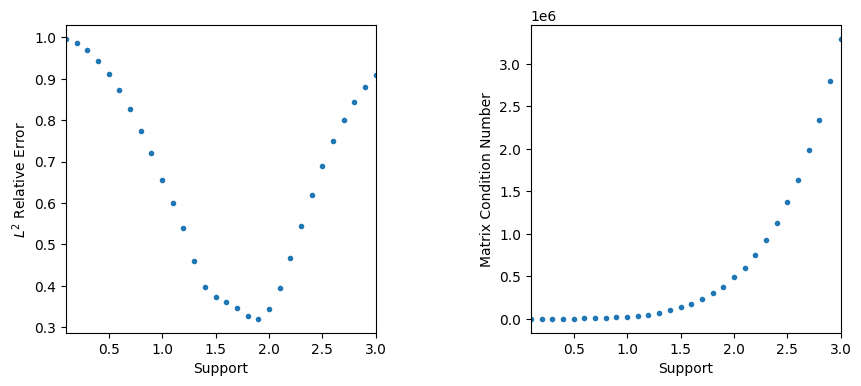

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(10,4))

axs[0].set_xlabel("Support")
axs[0].set_ylabel(r"$L^{2}$ Relative Error")
axs[0].plot(deltas, results[:, 0], '.')

axs[1].set_xlabel("Support")
axs[1].set_ylabel("Matrix Condition Number")
axs[1].plot(deltas, results[:, 1], '.')

plt.subplots_adjust(wspace=0.5)
plt.show()